In [1]:
install.packages("twitteR")
install.packages("ggmap")
install.packages("RSQLite")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘sp’, ‘proto’, ‘RgoogleMaps’, ‘png’, ‘mapproj’, ‘jpeg’, ‘geosphere’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(twitteR)
library(ggmap)
library(maps)

In [6]:
library(plyr)
library(RSQLite)


Attaching package: ‘plyr’

The following object is masked from ‘package:maps’:

    ozone

The following object is masked from ‘package:twitteR’:

    id



In [7]:
#authenticating
CONSUMER_KEY = "LhS2LVBbmbvJXwFRvoNZ2fuBP"
CONSUMER_SECRET = "0Ym9QH3sDRXlVDTgxyNafMEKhaJGAZECscaPTePRZNWoaeppdB"
ACCESS_TOKEN = "829481304706146305-8pCQl9Zbm6NdPeWulXTjyPmNvwJZyg9"
ACCESS_TOKEN_SECRET = "I5w2fGH0wHN3UhdMShDiU7BzcpePVFMVS20LhAH4ZuzoC"

setup_twitter_oauth(CONSUMER_KEY,
                    CONSUMER_SECRET,
                    ACCESS_TOKEN,
                    ACCESS_TOKEN_SECRET)

[1] "Using direct authentication"


In [8]:
#searching for tweets
searchTerm <- "paragon"
searchResult <- searchTwitter(searchTerm, n = 10000)

In [10]:
#storing in database
sql_lite_file = tempfile()
register_sqlite_backend(sql_lite_file)
store_tweets_db(searchResult)
from_db = load_tweets_db()

[1] TRUE

In [11]:
#making a dataFrame
tweetFrame <- twListToDF(from_db)

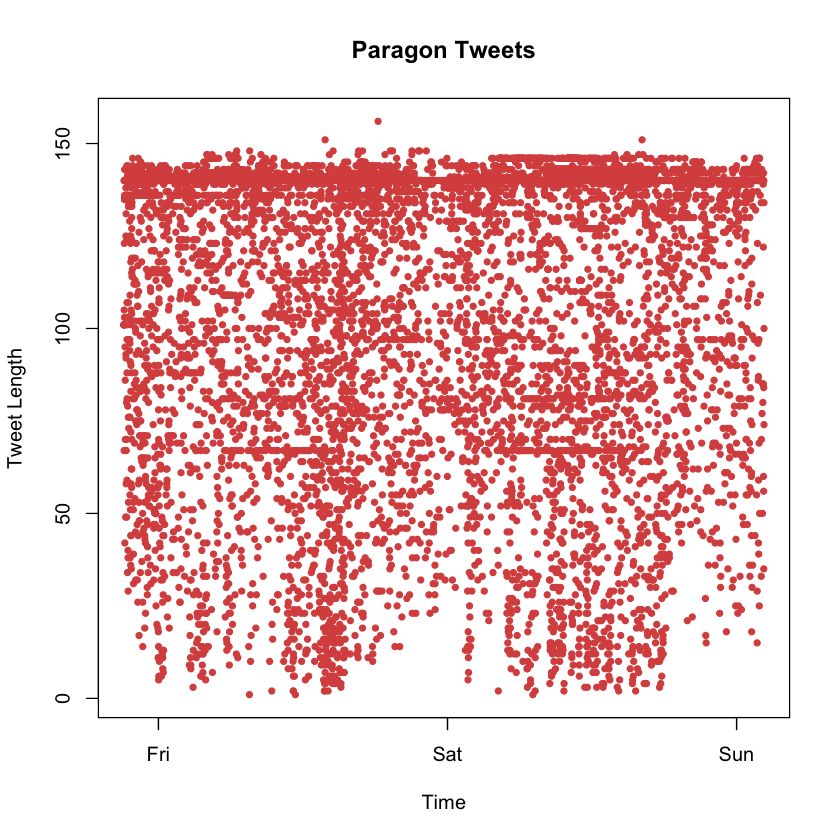

In [12]:
#plotting a point chart base on tweet Length, time and tweet/retweet.
t <- as.POSIXct(strptime(tweetFrame$created, "%Y-%m-%d %H:%M:%S"))
len <- nchar(tweetFrame$text)
rt <- unlist(lapply(tweetFrame$isRetweet, function(x){as.numeric(x)+1}))

c2 = c("#d9534f", "#428bca") #no red yes blue

plot(x=t , y=len, col = c2[rt], pch=20, xlab = "Time", ylab = "Tweet Length", main = "Paragon Tweets")

In [13]:
twfisrt <- count(na.omit(tweetFrame$isRetweet))

In [20]:
head(twfisrt)

x,freq
FALSE,10000


In [21]:
SClist <- tweetFrame$screenName

In [22]:
#getting userinfo from screenname
tusers <- lookupUsers(SClist)
userinfo <- twListToDF(tusers)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Laurentides&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=SOC%20,%20Indonesia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Perth,%20Western%20Australia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jepara%20%7C%7C%20semarang%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=in%20a%20concentration%20camp%20prob&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "in a concentration camp prob"”Information from URL : http://maps.

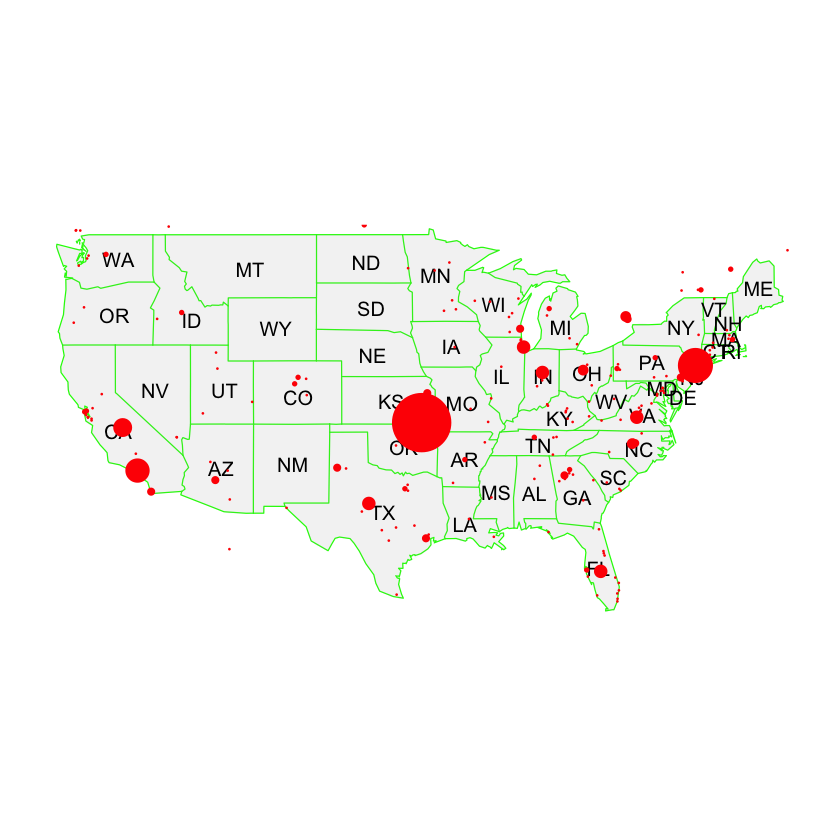

In [25]:
#getting userlocation from userinfo and coordinates from google map then plotting onto the map of usa using a density bubble chart
userlonlat <- geocode(userinfo[1:2500,]$location)
cuserlonlat <- count(na.omit(userlonlat))

usa1 <- map(database= "state", col="green", fill=FALSE)
usa2 <- map(database= "usa", col="#AAAAAA22", fill=TRUE,lty=0,add=TRUE)
usa3 <- text(x=state.center$x, y=state.center$y, state.abb)

points(cuserlonlat$lon, cuserlonlat$lat,col="red", pch=16, cex = cuserlonlat$freq*0.3)

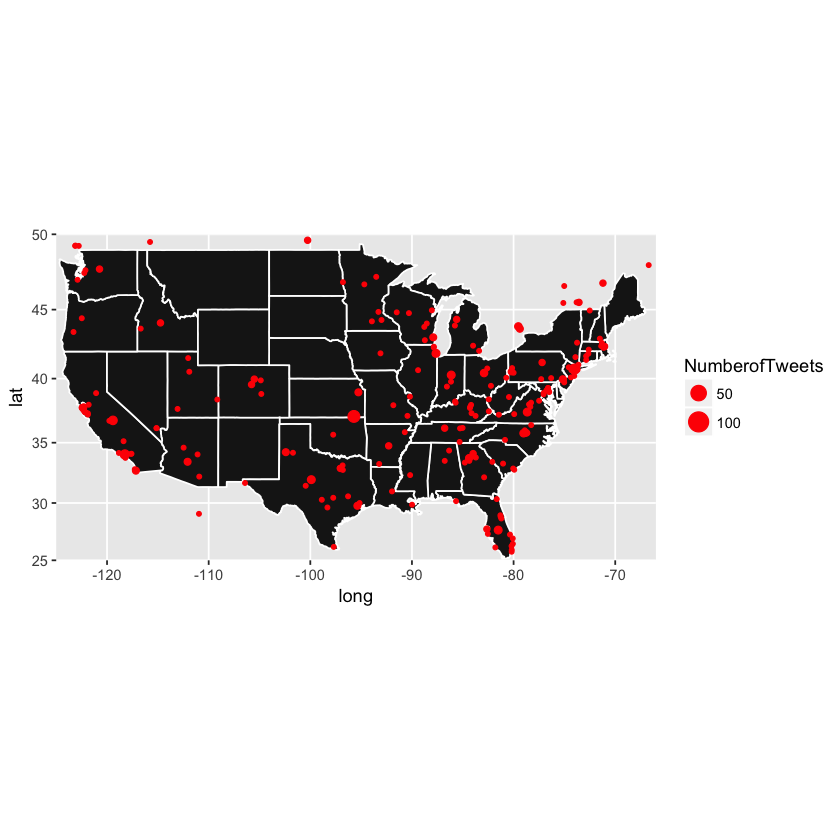

In [26]:
#alternate density bubble chart with cleaner representation
usa <- map_data("state")

NumberofTweets <- cuserlonlat$freq

ggplot() +
  geom_polygon( data=usa, aes(x=long, y=lat, group = group),colour="white", fill="grey10" ) +
  geom_point(data = cuserlonlat, aes(x = cuserlonlat$lon, y = cuserlonlat$lat, size = NumberofTweets), color = "red") +
  coord_map(xlim = c(-66, -125),ylim = c(25, 50))